In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd 
import cufflinks as cf 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
tips = sns.load_dataset('tips')
tips
                        

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='size', ylabel='smoker'>

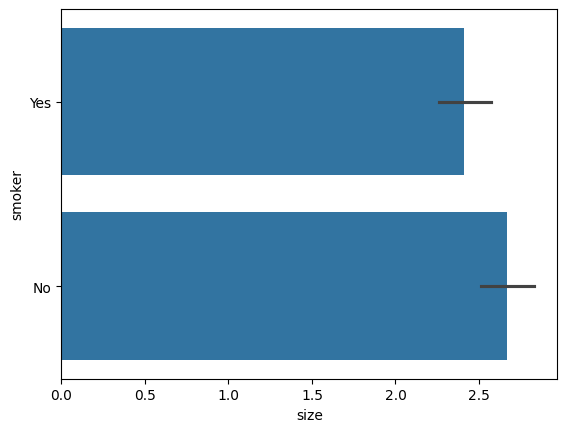

In [3]:
sns.barplot(x='size',y = 'smoker', data= tips)

<Axes: xlabel='smoker', ylabel='sex'>

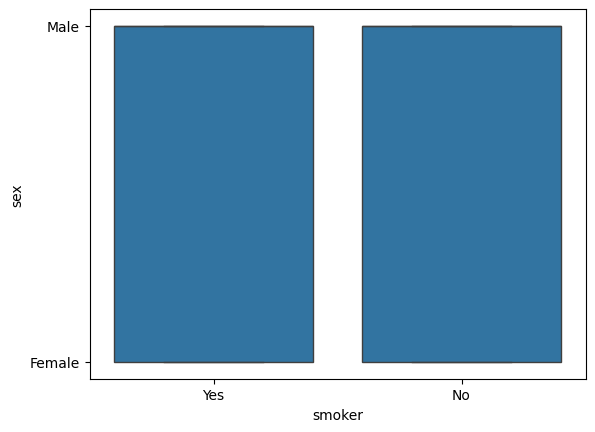

In [4]:
sns.boxplot(x = 'smoker',y= 'sex', data= tips)

In [5]:
# Label encoding for categorical columns
le = LabelEncoder()
for col in ['sex','smoker','day','time']:
    tips[col] = le.fit_transform(tips[col])

In [6]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


In [7]:
X = tips.drop('time',axis= 1) 
y = tips['time'] 

 

In [8]:
print("shap of x = ", X.shape)
print("shap y =", y.shape)

shap of x =  (244, 6)
shap y = (244,)


In [9]:
 X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.2, random_state=42)

In [10]:
print("shape of x =", X_train.shape) 
print("shape of x test =", X_test.shape) 
print("shape of y = ", y_train.shape) 
print ("shape of x =", y_test.shape)

shape of x = (195, 6)
shape of x test = (49, 6)
shape of y =  (195,)
shape of x = (49,)


In [11]:
X_train

,total_bill,tip,sex,smoker,day,size
228,13.28,2.72,1,0,1,2
208,24.27,2.03,1,1,1,2
96,27.28,4.00,1,1,0,2
167,31.71,4.50,1,0,2,4
84,15.98,2.03,1,0,3,2
...,...,...,...,...,...,...
106,20.49,4.06,1,1,1,2
14,14.83,3.02,0,0,2,2
92,5.75,1.00,0,1,0,2
179,34.63,3.55,1,1,2,2


In [12]:
le = LabelEncoder()
y_encoder = le.fit_transform(y) 

In [13]:
y_encoder

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [14]:
X_train

,total_bill,tip,sex,smoker,day,size
228,13.28,2.72,1,0,1,2
208,24.27,2.03,1,1,1,2
96,27.28,4.00,1,1,0,2
167,31.71,4.50,1,0,2,4
84,15.98,2.03,1,0,3,2
...,...,...,...,...,...,...
106,20.49,4.06,1,1,1,2
14,14.83,3.02,0,0,2,2
92,5.75,1.00,0,1,0,2
179,34.63,3.55,1,1,2,2


In [15]:
base_learners = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svc', SVC(probability=True, kernel='rbf', random_state=42)),
    ('lr', LogisticRegression(max_iter=1000))
]

In [16]:
meta_learner = LogisticRegression(max_iter=1000)

In [17]:
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5
)

In [18]:
stacking_clf

,estimators,"[('dt', ...), ('svc', ...), ...]"
,final_estimator,LogisticRegre...max_iter=1000)
,cv,5
,stack_method,'auto'
,n_jobs,None
,passthrough,False
,verbose,0
,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2


In [19]:
dt = DecisionTreeClassifier(random_state= 42)
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [20]:
 pred = dt.predict(X_test)


In [21]:
dt.score(X_test,y_test)

0.9387755102040817

In [22]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

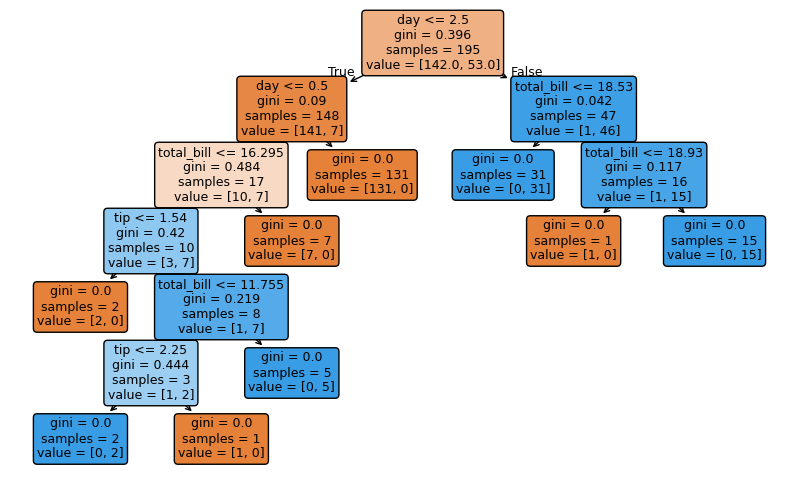

In [23]:

plt.figure(figsize=(10,6))
plot_tree(dt, feature_names=X.columns, filled=True, rounded=True)
plt.show()